In [1]:
#locate where data file is
import os
os.chdir("/home/mp6576/comp-class-2023/comp-lab-class-2023/Week2/Data/")

In [2]:
#open the file
filename = "1hz3_T310.run.25000000.energy.xvg"
#list the data values from that file
data = open(filename).read()
print(data)

# This file was created Tue Sep 13 13:28:40 2022
# Created by:
#                      :-) GROMACS - gmx energy, 2020.4 (-:
# 
# Executable:   /share/apps/gromacs/2020.4/openmpi/intel/bin/gmx_mpi
# Data prefix:  /share/apps/gromacs/2020.4/openmpi/intel
# Working dir:  /scratch/projects/hockygroup/gmh4/projects/CompLab/comp-lab-class/Week2/Data
# Command line:
#   gmx_mpi energy -f 1hz3_T310.run.25000000.edr
# gmx energy is part of G R O M A C S:
#
# Georgetown Riga Oslo Madrid Amsterdam Chisinau Stockholm
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(kJ/mol), (K), (bar), (nm^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on
@ legend loctype view
@ legend 0.78, 0.8
@ legend length 2
@ s0 legend "Potential"
@ s1 legend "Kinetic En."
@ s2 legend "Total Energy"
@ s3 legend "Temperature"
@ s4 legend "Pressure"
@ s5 legend "Volume"
    0.000000  -175680.937500  35128.644531  -140552.296875  309.853302   84.967438  137.956879
  100.00000

In [3]:
import numpy as np
data = np.genfromtxt(filename, skip_header=29)

Time_ps = data[:,0]
Potential = data[:,1]
Kinetic_En = data[:,2]
Total_Energy = data[:,3]
Temperature = data[:,4]
Pressure = data[:,5]
Volume = data[:,6]

#converting time values from ps to ns
Time_ns= Time_ps/1000

#y_labels is a dictionary (associating each variable with a label)
y_labels={'Potential Energy (kJ/mol)': Potential,
         'Kinetic Energy (kJ/mol)': Kinetic_En,
         'Total Energy (kJ/mol)': Total_Energy,
         'Temperature (K)': Temperature,
         'Pressure (bar)': Pressure,
         'Volume (nm\u00b3)': Volume}

print(Time_ns)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

Week2Part4:Figure_1_Potential_Energy (kJ\mol).pdf
Plot saved to PDF successfully.
Week2Part4:Figure_2_Kinetic_Energy (kJ\mol).pdf
Plot saved to PDF successfully.
Week2Part4:Figure_3_Total_Energy (kJ\mol).pdf
Plot saved to PDF successfully.
Week2Part4:Figure_4_Temperature (K).pdf
Plot saved to PDF successfully.
Week2Part4:Figure_5_Pressure (bar).pdf
Plot saved to PDF successfully.
Week2Part4:Figure_6_Volume (nm3).pdf
Plot saved to PDF successfully.


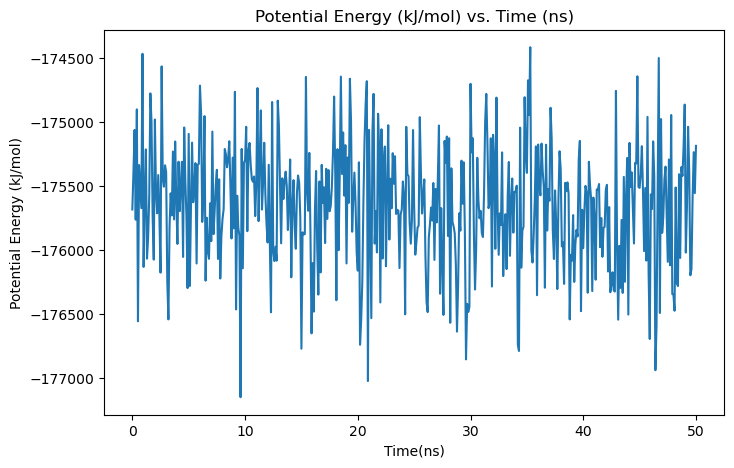

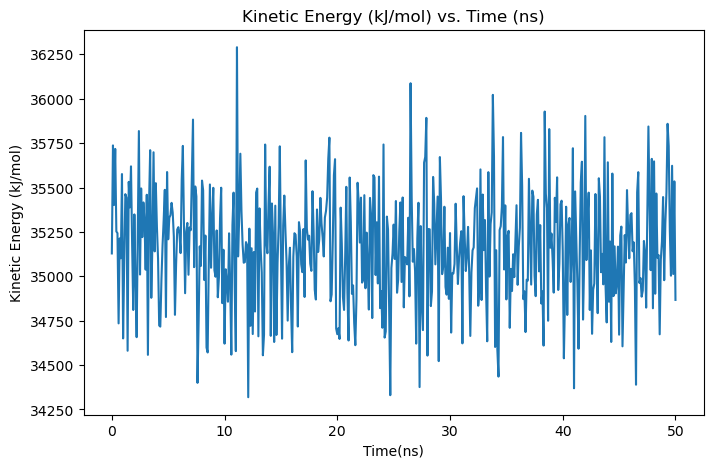

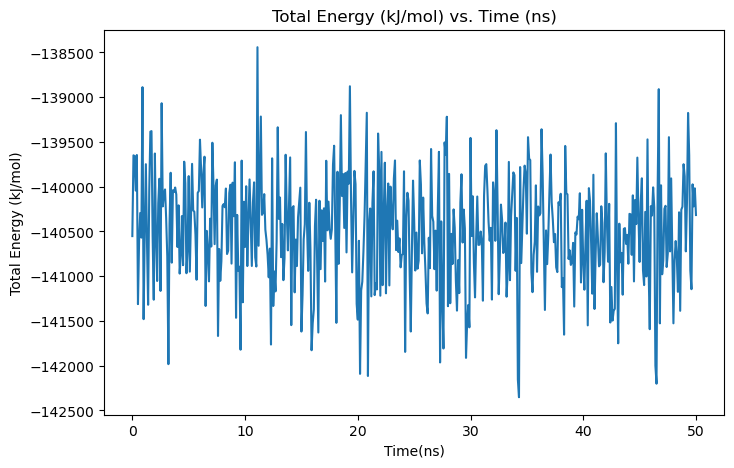

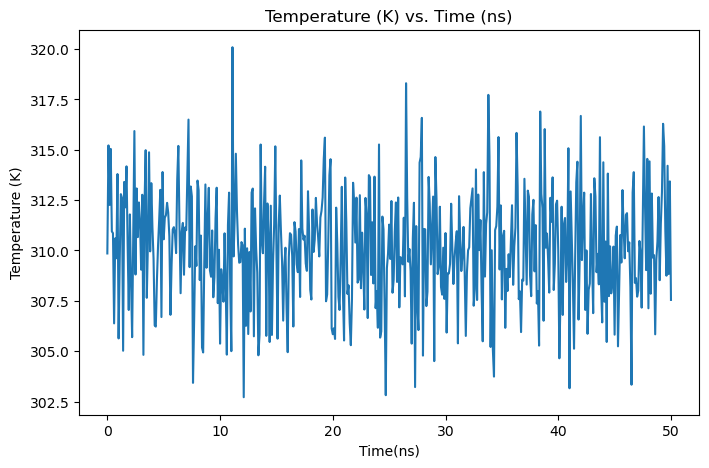

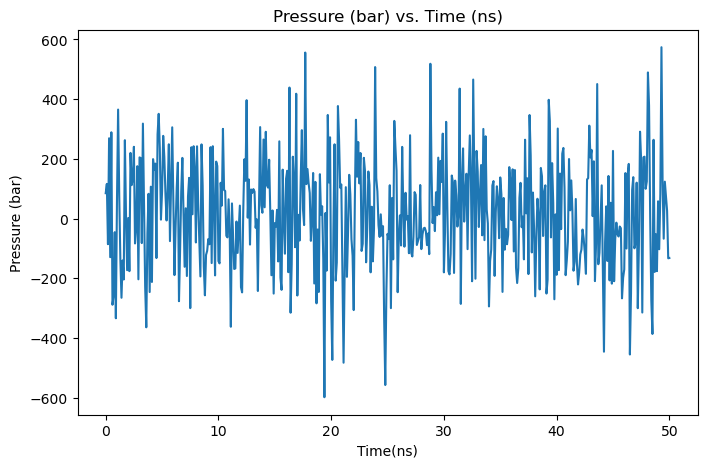

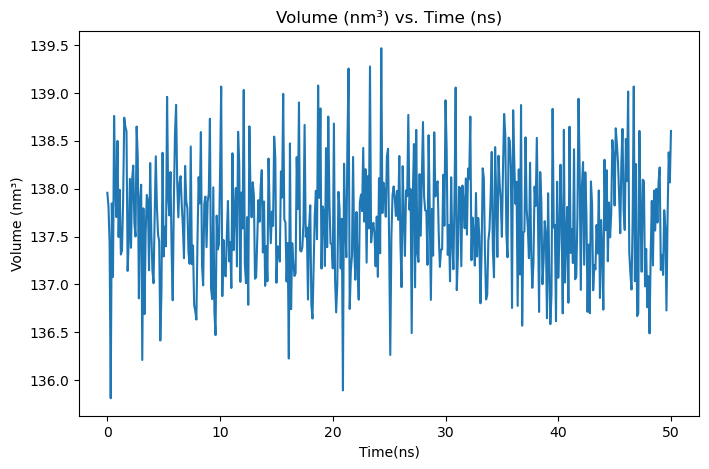

In [41]:
import matplotlib.pyplot as plt

# Define the directory and sequence
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week2/Analysis/FinalPlots/"
seq = ["Potential_Energy (kJ\mol)", "Kinetic_Energy (kJ\mol)", "Total_Energy (kJ\mol)", "Temperature (K)", "Pressure (bar)", "Volume (nm3)"]

# Check if the directory exists, if not create it
if not os.path.exists(directory):
    try:
        os.makedirs(directory)
    except OSError as e:
        print(f"Error creating directory: {e}")
        print("File not saved")
    else:
        print("Directory created successfully")
j=0
k = 1
for i in y_labels:
    ax = plt.figure(figsize=(8,5))
    plt.plot(Time_ns,y_labels[i])
#commands of matplot    
    plt.ylabel(i)
    plt.xlabel("Time(ns)")
    plt.title(i + ' vs. Time (ns)')
    fname = "Week2Part4:Figure_" + str(k) + "_" + seq[j] + ".pdf"
    print(fname)
    # Save the plot to a PDF file
    try:
        plt.savefig(os.path.join(directory, fname))
        print("Plot saved to PDF successfully.")
    except Exception as e:
        print(f"Error saving plot: {e}")
        print("File not saved")
    j += 1
    k += 1

Plot saved to PDF successfully.


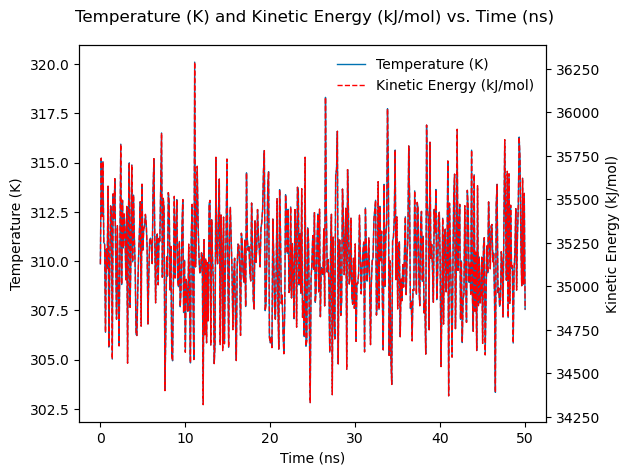

In [59]:
fig, ax1 = plt.subplots()                           
plt.suptitle('Temperature (K) and Kinetic Energy (kJ/mol) vs. Time (ns)')       
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Temperature (K)')
ax1.plot(data[:,0]/1000,data[:,4],color='#0072B2',linestyle='solid',linewidth=1)
ax2 = ax1.twinx()
ax2.set_ylabel('Kinetic Energy (kJ/mol)')
ax2.plot(data[:,0]/1000,data[:,2],color='#FF0000',linestyle='dashed',linewidth=1)
fig.tight_layout()
fig.legend(['Temperature (K)','Kinetic Energy (kJ/mol)'],loc='upper right',bbox_to_anchor=(1,1),bbox_transform=ax1.transAxes,frameon=False)

# Define the directory and filename
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week2/Analysis/FinalPlots"
fname = "Week2Part4-Fig.7: Temperature and Kinetic Energy (kJmol) vs Time (ns).pdf"

# Check if the directory exists, if not create it
if not os.path.exists(directory):
    try:
        os.makedirs(directory)
    except OSError as e:
        print(f"Error creating directory: {e}")
        print("File not saved")
    else:
        print("Directory created successfully")

# Save the plot to a PDF file
try:
    plt.savefig(os.path.join(directory, fname))
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

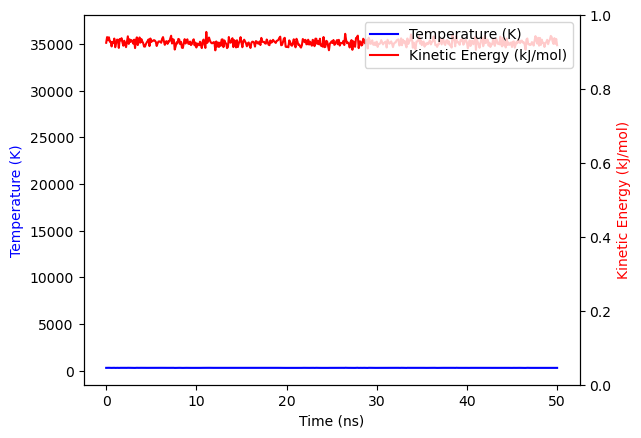

In [6]:
#DID NOT USE THIS PLOT
#issue with this plot method is y-axis ranges are not matching so tried out plt.suptitle (see ln[31])
fig, ax1 = plt.subplots()

ax1.plot(Time_ns, Temperature, label='Temperature (K)', color='blue')
ax1.plot(Time_ns,Kinetic_En,label='Kinetic Energy (kJ/mol)',color='red')

ax2=ax1.twinx()
ax1.set_ylabel('Temperature (K)',color='blue')
ax2.set_ylabel('Kinetic Energy (kJ/mol)',color='red')
ax1.legend(loc='upper right')

ax1.set_xlabel('Time (ns)')

plt.show()